<font size = '6'><b>Discrete Signals</b></font>

<table style="border-style: hidden; border-collapse: collapse;" width = "90%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 60% style="border-style: hidden; border-collapse: collapse;">
             
        </td>
        <td width = 30%>
        Prof. Seungchul Lee<br>
        iSystems<br>
        UNIST<br>
        http://isystems.unist.ac.kr/
        </td>
    </tr>
</table>

Table of Contents
<div id="toc"></div>

# 0. Introduction

Signal processing studies _signals_ and _systems_

Signal: 
- A detectable physical quantity... by which messages or information can be transmitted
- Signal carreis information

systems: 
- Manipulate the information carried by signals

Goals:
- Develop intuition into and learn how to reason analytically about signal processing problems

Prerequisites that you have a solid understanding of 
- Complex numbers and arithmetic
- Linear algebra (vector, matrix, dot products, eigenvectors, basis, ...)
- Matlab or python

# 1. Discrete Time Signals

A __signal__ $x[n]$ is a function that maps an independent variable to a dependent variable.

In this course, we will focus on discrete-time signals $x[n]$:
- Independent variable is an integer: $n \in \mathbb{Z}$
- Dependent variable is a real or complex number: $x[n] \in \mathbb{R} \;\text{or}\; \mathbb{C}$


## 1.1. Plot real signals

- `plot` for continuous signals in Matlab

- `stem` for discrete signals in Matlab

In [159]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import cmath
from numpy import linalg as LA
import scipy.io as sio

% matplotlib inline

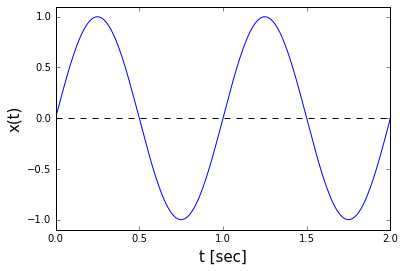

In [160]:
t = np.arange(0, 2.01, 0.01)
x = np.sin(2*np.pi*t)

plt.plot(t, x)
plt.axhline(0,c='k',ls='--')

plt.ylim([-1.1, 1.1])
plt.xlabel('t [sec]',fontsize=15);plt.ylabel('x(t)',fontsize=15)

plt.show()

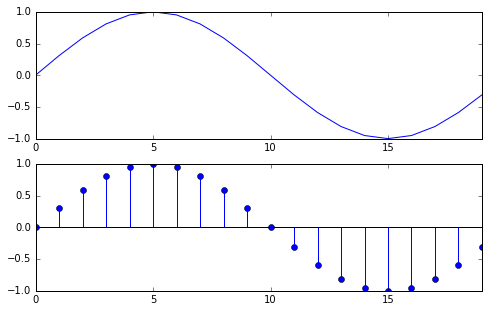

In [161]:
N = 20
n = np.arange(0,N,1)
x = np.sin(2*np.pi/N*n)

plt.figure(figsize=(8,5))
plt.subplot(2,1,1); plt.plot(n,x); plt.axis('tight')
plt.subplot(2,1,2); plt.stem(n,x); plt.axis('tight')
plt.axhline(0,c='k')

plt.show()

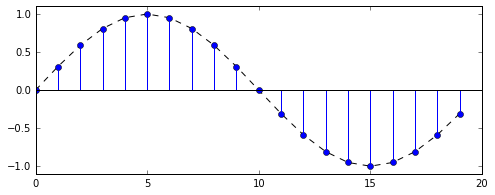

In [162]:
plt.figure(figsize=(8,3))
plt.plot(n,x,'k--')
plt.stem(n,x)
plt.ylim([-1.1, 1.1])
plt.axhline(0,c='k')
plt.show()

## 1.2. Plot Complex Signals

A complex signal $x[n] \in \mathbb{C}$ can be equivalently represented in two ways
- rectangular form
$$ x[n]= \text{Re}\{x[n]\} + j\,\text{Im}\{x[n]\}$$

- polar form
$$x[n] = \lvert x[n] \rvert \, e^{j \angle x[n]}$$



For example,

$$x[n]=e^{-\frac{n}{N}}e^{j\frac{2\pi}{N} n}$$

In [163]:
N = 20;
n = np.arange(0, 2*N, 1)
x = np.exp(-n/N)*np.exp(1j * 2*np.pi/N*n)

__retangular form__

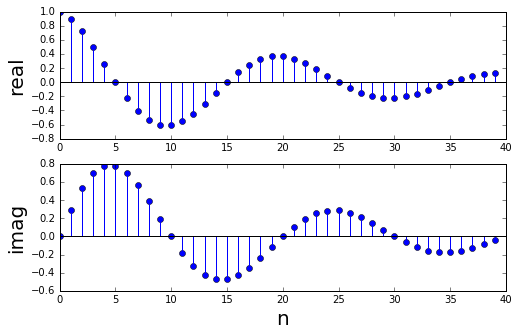

In [164]:
plt.figure(figsize=(8,5))
plt.subplot(2,1,1);plt.stem(n,x.real); plt.ylabel('real',fontsize=20)
plt.axhline(0,c='k')
plt.subplot(2,1,2);plt.stem(n,x.imag); plt.ylabel('imag',fontsize=20); plt.xlabel('n',fontsize=20)
plt.axhline(0,c='k')

plt.show()

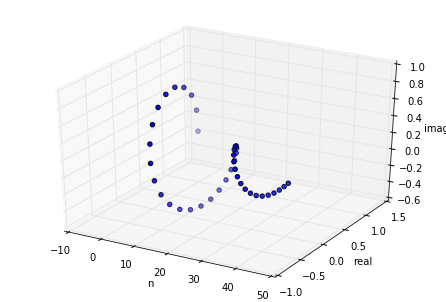

In [165]:
fig = plt.figure()
ax = Axes3D(fig) #or ax = plt.subplot(111, projection='3d')


xax = n
yax = x.real
zax = x.imag

ax.scatter(xax, yax, zax, c='b', marker='o')
ax.set_xlabel('n')
ax.set_ylabel('real')
ax.set_zlabel('imag')
#ax.w_xaxis._axinfo.update({'grid' : {'color': (0, 0, 0, 1)}})
#ax.w_yaxis._axinfo.update({'grid' : {'color': (0, 0, 0, 1)}})
#ax.w_zaxis._axinfo.update({'grid' : {'color': (0, 0, 0, 1)}})
# ax.view_init(elev=30, azim= 230)

plt.show()

__polar form__

$$x[n] = \lvert x[n]\lvert \, e^{j\angle x[n]} \;\in\; \mathbb{C}$$

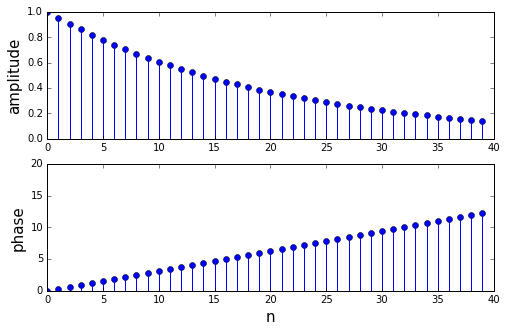

In [166]:
plt.figure(figsize=(8,5))
plt.subplot(2,1,1); plt.stem(n,abs(x)), plt.ylabel('amplitude',fontsize=15)
p = 2*np.pi/N*n
plt.subplot(2,1,2); plt.stem(n,p),plt.ylim([0,20])
plt.ylabel('phase',fontsize=15), plt.xlabel('n',fontsize=15)

plt.show()

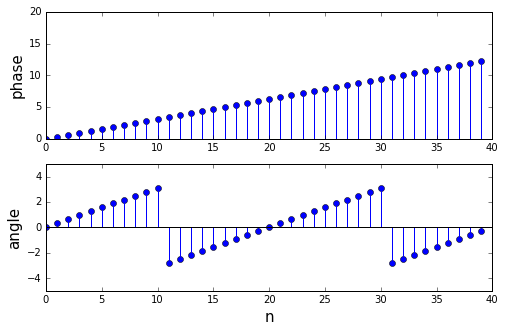

In [167]:
p = 2*np.pi/N*n
plt.figure(figsize=(8,5))
plt.subplot(2,1,1); plt.stem(n,p),plt.ylim([0,20]), plt.ylabel('phase',fontsize=15)
plt.subplot(2,1,2); plt.stem(n,np.angle(x)), plt.ylim([-5,5])
plt.ylabel('angle',fontsize=15), plt.xlabel('n',fontsize=15)
plt.axhline(0,c='k')
plt.show()

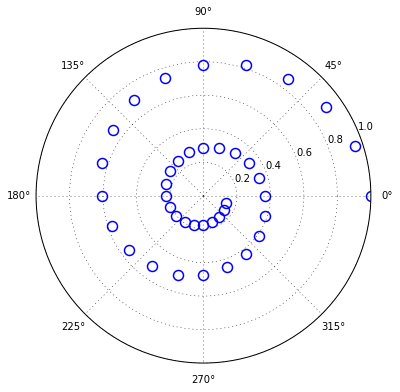

In [168]:
plt.figure(figsize=(6,6))
ax = plt.subplot(111, projection='polar')
plt.plot(np.angle(x),abs(x),'o',ms=10,mfc='none',mec='b',mew=1.5)

plt.show()

# 2. Signal Properties

## 2.1 Periodic Signals

$$
x[n+mN]=x[n] \quad \forall m \in \mathbb{Z}$$

<br>
<img src = "./image_files/periodic.png" style="border:1px solid black" width = 750>


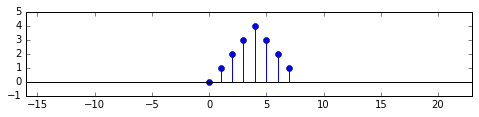

In [169]:
N = 8
n = np.array(range(N))
x = [0, 1, 2, 3, 4, 3, 2, 1]

plt.figure(figsize=(8,1.5))
plt.stem(n,x)
plt.axhline(0, color = 'k')

plt.xlim(-16,23), plt.ylim(-1,5)


plt.show()

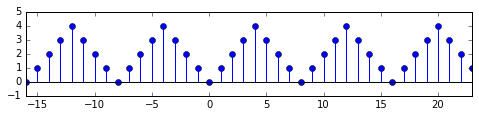

In [170]:
n = np.array(range(-16,24))

y = np.tile(x, 5)

plt.figure(figsize=(8,1.5))
plt.stem(n,y)
plt.axis('tight'), plt.ylim(-1,5)
plt.axhline(0, color = 'k')

plt.show()

__Shifting Periodic Signals__

<img src = "./image_files/circular.png" style="border:1px solid black" width = 750>

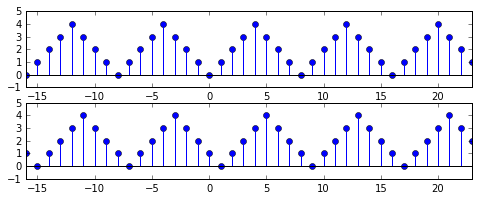

In [171]:
n = np.array(range(-16,24))
x = [0, 1, 2, 3, 4, 3, 2, 1]
xs = np.roll(x,1)

plt.figure(figsize=(8,3))
plt.subplot(2,1,1), plt.stem(n,np.tile(x,5)), plt.axis('tight'), plt.ylim(-1,5)
plt.axhline(0, color = 'k')
plt.subplot(2,1,2), plt.stem(n,np.tile(xs,5)), plt.axis('tight'), plt.ylim(-1,5)
plt.axhline(0, color = 'k')

plt.show()

Check this python program to visualize circular (periodic finite-length signals)

https://github.com/unpingco/Python-for-Signal-Processing/blob/master/Fourier_Transform.ipynb

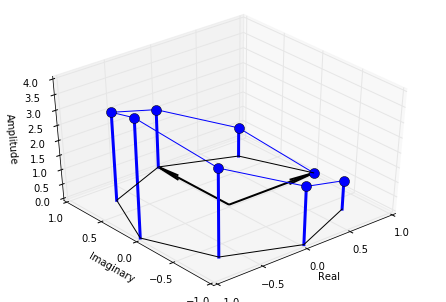

In [172]:
N = 8
theta2 = np.arange(0, 1+1/N, 1/N)*2*np.pi
theta = theta2[0:len(theta2)-1]

x = np.cos(theta)
y = np.sin(theta)
z = [0, 1, 2, 3, 4, 3, 2, 1]

fig = plt.figure()
ax = Axes3D(fig) #or ax = plt.subplot(111, projection='3d')

for i in range(len(x)):
    ax.plot([x[i], x[i]], [y[i], y[i]], [0, z[i]], color = 'b', linewidth = 3)

ax.plot(x, y, z, c='b', marker='o', ms=10)
ax.plot(x, y, c='k')
ax.quiver(0,1,0,0,1,0,color='k',linewidth=2)
ax.quiver(1,0,0,1,0,0,color='k',linewidth=2)

ax.view_init(elev=40, azim= 230)
ax.set_xlabel('Real')
ax.set_ylabel('Imaginary')
ax.set_zlabel('Amplitude')

plt.show()


## 2.2. Causal Signals

A signal $x[n]$ is __causal__ if $$x[n]=0 \;\;\text{for all}\; n < 0$$


## 2.3. Even/Odd Signals

A real signal $x[n]$ is __even__ if $$x[-n] = x[n]$$

# Sinusoids

$$
e ^ {j(\omega n+\phi)} = \cos (\omega n + \phi) + j \sin (\omega n + \phi)$$

- <font color='blue'>Real part</font> ($\cos$ term) is the projection onto the $Re\{\}$ axis

- <font color='red'>Imaginary part</font> ($\sin$ term) is the projection onto the $Im\{\}$ axis

<img src="./image_files/rising_circular.gif",width=300,height=300>

> Discrete Sinusoids (Digital Signal Processing - Shimon Michael Lustig at Berkeley)

> $$x[n] = A\cos(\omega_0 n + \phi)$$ or 

> $$x[n] = Ae^{j\omega_0 n + j \phi}$$

> If $\frac{\omega_0}{\pi} $ is rational (different from Continuous Time) 

> To find fundamental period N
>> find smallest integers k, N
$$\omega_0 N = 2\pi k$$




---
**Examples**

> 1) $\cos\left(\frac{5}{7}\pi n\right)$ 

$$N = 14$$ $$k = 5$$


> 2) $\cos\left(\frac{1}{5}\pi n\right)$ 
$$N = 10$$ $$k = 1$$

> 3) Which frequency is higher?

> 4) $\cos\left(\frac{5}{7}\pi n\right) + \cos\left(\frac{1}{5}\pi n\right)$
$$N = ?$$ $$k=?$$

> 5) Which one is a higher frequency?
$$\omega_0 = \pi ~ \text{or} ~ \omega_0 = \frac{3\pi}{2}$$

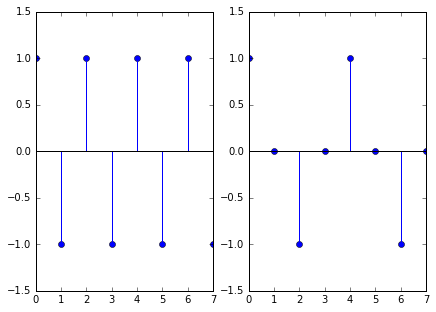

In [173]:
n = np.array(range(8))
x1 = np.cos(np.pi*n)
x2 = np.cos(3/2*np.pi*n)

plt.figure(figsize=(7,5))
plt.subplot(1,2,1), plt.stem(n,x1), plt.axis([0,7,-1.5,1.5])
plt.axhline(0, color = 'k')
plt.subplot(1,2,2), plt.stem(n,x2), plt.axis([0,7,-1.5,1.5])
plt.axhline(0, color = 'k')

plt.show()

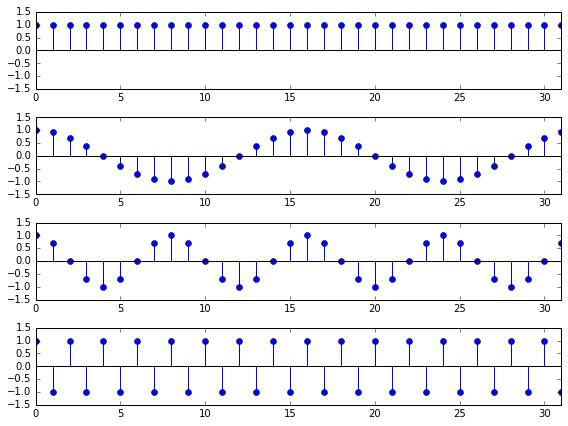

In [174]:
n = np.array(range(32))
x1 = np.cos(0*np.pi*n)
x2 = np.cos(1/8*np.pi*n)
x3 = np.cos(1/4*np.pi*n)
x4 = np.cos(1*np.pi*n)

plt.figure(figsize=(8,6))
plt.subplot(4,1,1), plt.stem(n,x1), plt.axis([0,31,-1.5,1.5])
plt.axhline(0, color = 'k')
plt.subplot(4,1,2), plt.stem(n,x2), plt.axis([0,31,-1.5,1.5])
plt.axhline(0, color = 'k')
plt.subplot(4,1,3), plt.stem(n,x3), plt.axis([0,31,-1.5,1.5])
plt.axhline(0, color = 'k')
plt.subplot(4,1,4), plt.stem(n,x4), plt.axis([0,31,-1.5,1.5])
plt.axhline(0, color = 'k')
plt.tight_layout()

plt.show()

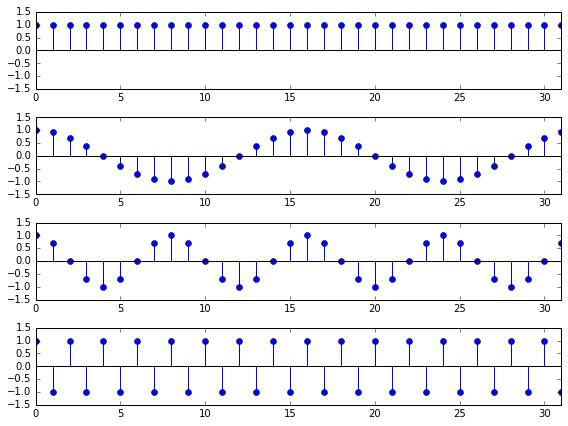

In [175]:
n = np.array(range(32))
x1 = np.cos(2*np.pi*n)
x2 = np.cos(15/8*np.pi*n)
x3 = np.cos(7/4*np.pi*n)
x4 = np.cos(1*np.pi*n)

plt.figure(figsize=(8,6))
plt.subplot(4,1,1), plt.stem(n,x1), plt.axis([0,31,-1.5,1.5])
plt.axhline(0, color = 'k')
plt.subplot(4,1,2), plt.stem(n,x2), plt.axis([0,31,-1.5,1.5])
plt.axhline(0, color = 'k')
plt.subplot(4,1,3), plt.stem(n,x3), plt.axis([0,31,-1.5,1.5])
plt.axhline(0, color = 'k')
plt.subplot(4,1,4), plt.stem(n,x4), plt.axis([0,31,-1.5,1.5])
plt.axhline(0, color = 'k')
plt.tight_layout()

plt.show()

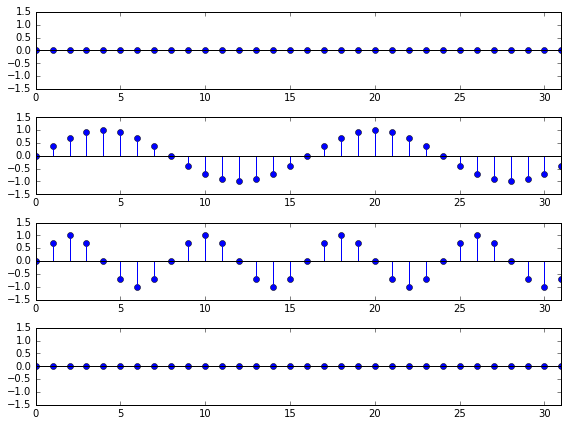

In [176]:
n = np.array(range(32))
x1 = np.sin(0*np.pi*n)
x2 = np.sin(1/8*np.pi*n)
x3 = np.sin(1/4*np.pi*n)
x4 = np.sin(1*np.pi*n)

plt.figure(figsize=(8,6))
plt.subplot(4,1,1), plt.stem(n,x1), plt.axis([0,31,-1.5,1.5])
plt.axhline(0, color = 'k')
plt.subplot(4,1,2), plt.stem(n,x2), plt.axis([0,31,-1.5,1.5])
plt.axhline(0, color = 'k')
plt.subplot(4,1,3), plt.stem(n,x3), plt.axis([0,31,-1.5,1.5])
plt.axhline(0, color = 'k')
plt.subplot(4,1,4), plt.stem(n,x4), plt.axis([0,31,-1.5,1.5])
plt.axhline(0, color = 'k')
plt.tight_layout()

plt.show()

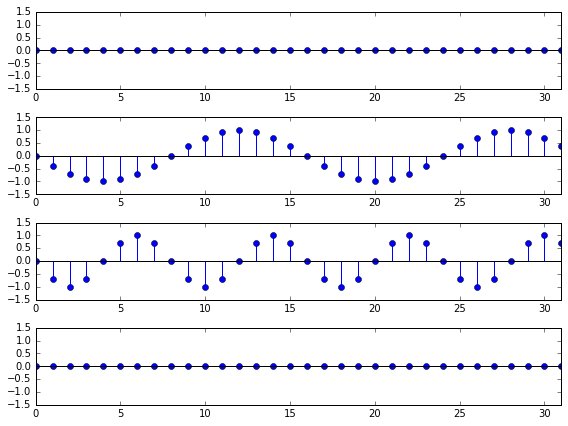

In [177]:
n = np.array(range(32))
x1 = np.sin(2*np.pi*n)
x2 = np.sin(15/8*np.pi*n)
x3 = np.sin(7/4*np.pi*n)
x4 = np.sin(1*np.pi*n)

plt.figure(figsize=(8,6))
plt.subplot(4,1,1), plt.stem(n,x1), plt.axis([0,31,-1.5,1.5])
plt.axhline(0, color = 'k')
plt.subplot(4,1,2), plt.stem(n,x2), plt.axis([0,31,-1.5,1.5])
plt.axhline(0, color = 'k')
plt.subplot(4,1,3), plt.stem(n,x3), plt.axis([0,31,-1.5,1.5])
plt.axhline(0, color = 'k')
plt.subplot(4,1,4), plt.stem(n,x4), plt.axis([0,31,-1.5,1.5])
plt.axhline(0, color = 'k')
plt.tight_layout()

plt.show()

__Aliasing__

In descrete signal, there is identical signals with different frequency.

$$x_1[n] = e^{j((\omega+2\pi)n+\phi)} = e^{j(\omega n+\phi)+j2\pi n} = e^{j(\omega n+\phi)}e^{j2\pi n} = e^{j(\omega n+\phi)} = x_2[n]$$

Any integer multiple of $\,2\pi$ will do
$$x_3[n] = e^{j((\omega+2\pi m)n+\phi)}, \, m \in \mathbb{Z}$$

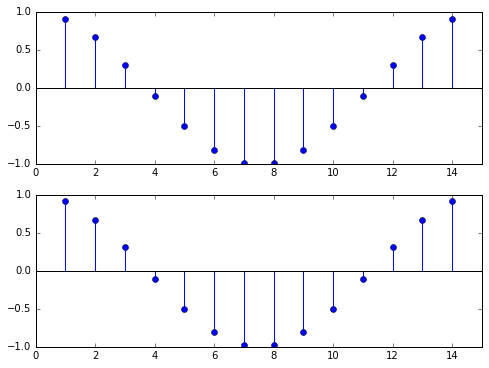

In [178]:
N = 15
k = 1
n = np.array(range(1,N))

xn = np.cos(2*np.pi*k*n/N)
xn2 = np.cos((2*np.pi*k/N + 2*np.pi)*n)

plt.figure(figsize=(8,6))   
plt.subplot(2,1,1), plt.stem(n,xn), plt.xlim(0,15), plt.axhline(0,c='k')
plt.subplot(2,1,2), plt.stem(n,xn2), plt.xlim(0,15), plt.axhline(0,c='k')

plt.show()

# Signal Visualization

## Visualize the Harmonic Sinusoidals
- at Rice University
- by Richard Baraniuk
- https://www.youtube.com/watch?v=wK4M1h1y7Hk&list=PLBD_gON7g_m1JMmglYLzxFZoDuzcabq-0&index=8

## Visualize the Harmonic Sinusoidals
- at Rice University
- by Richard Baraniuk
- https://www.youtube.com/watch?v=wK4M1h1y7Hk&list=PLBD_gON7g_m1JMmglYLzxFZoDuzcabq-0&index=8

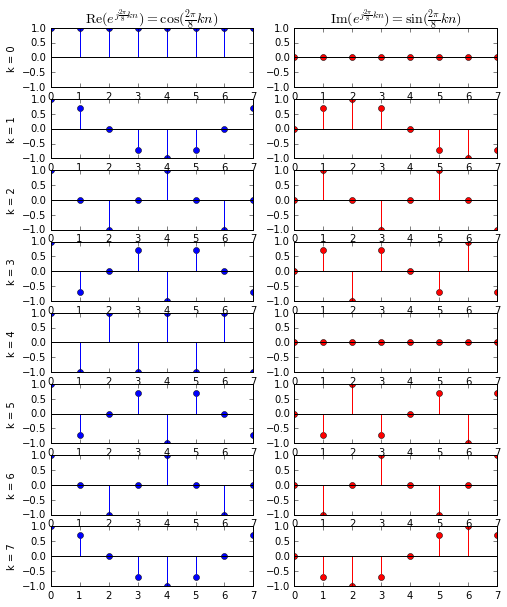

In [179]:
N = 8
n = np.array(range(N))

plt.figure(figsize=(8,10))

for i in range(8):
    
    x = np.exp(1j*(2*np.pi/N)*i*n)
    plt.subplot(8,2,2*i+1), plt.stem(n,np.real(x),'b'), plt.axis([0,7,-1,1])
    plt.axhline(0, color = 'k')
    plt.ylabel('k = ' + str(i))
    plt.subplot(8,2,2*i+2), plt.stem(n,np.imag(x), 'r', markerfmt = 'ro'), plt.axis([0,7,-1,1])
    plt.axhline(0, color = 'k')
    

plt.subplot(8,2,1), plt.title(r'${\rm Re}(e^{j \frac{2\pi}{8}kn}) = \cos(\frac{2\pi}{8}kn)$', fontsize = 14)
plt.subplot(8,2,2), plt.title(r'${\rm Im}(e^{j \frac{2\pi}{8}kn}) = \sin(\frac{2\pi}{8}kn)$', fontsize = 14)
plt.show()

## Visual Matrix of Harmonic Sinusoids
- https://www.youtube.com/watch?v=wK4M1h1y7Hk&list=PLBD_gON7g_m1JMmglYLzxFZoDuzcabq-0&index=8

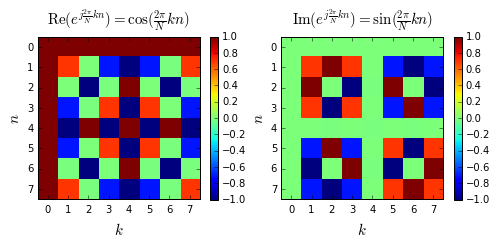

In [180]:
N = 8
n = np.array(range(N))

D = np.zeros((8,8)) + 0j

for k in range(8):
    D[:,k] = np.exp(1j*(2*np.pi/N)*k*n)

plt.figure(figsize=(8,8))

f1 = plt.subplot(1,2,1).matshow(np.real(D))
plt.xlabel('\n$k$', fontsize=15, position = (0.5,-0.1)), plt.ylabel('$n$', fontsize=15)
plt.xticks(y=-0.12)
plt.title(r'${\rm Re}(e^{j\frac{2\pi}{N}kn})=\cos(\frac{2\pi}{N}kn)$', fontsize=15)
plt.colorbar(f1, shrink = 0.365)

f2 = plt.subplot(1,2,2).matshow(np.imag(D))
plt.xlabel('\n$k$', fontsize=15, position = (0.5,-0.1)), plt.ylabel('$n$', fontsize=15)
plt.xticks(y=-0.12)
plt.title(r'${\rm Im}(e^{j\frac{2\pi}{N}kn})=\sin(\frac{2\pi}{N}kn)$', fontsize=15)
plt.colorbar(f2, shrink = 0.365)



plt.show()

## Visualizing Complex Exponentials $z^n$
- from https://www.youtube.com/watch?v=tMSfLzWWHzg&list=PLBD_gON7g_m1JMmglYLzxFZoDuzcabq-0&index=9

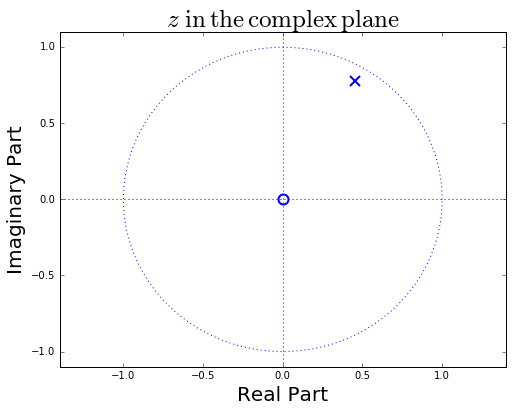

In [244]:
# Visualizing Complex Exponentials z^n 

# input value of z
z = 0.9 * np.exp(1j*np.pi/3)
# z = 0.9 + j * 0

def zplane(a,b):
    lst1 = np.array(range(100))
    si = np.sin(2*np.pi*lst1/(len(lst1)-1))
    co = np.cos(2*np.pi*lst1/(len(lst1)-1))
    plt.figure(figsize=(8,6))
    plt.plot(a.real,a.imag,'o',co,si,'b:',b.real,b.imag,'x',ms=10,mfc='none',mew=2,mec='b')
    plt.title(r'$z\, \, \rm{in\, the\, complex\, plane}$',fontsize=25)
    plt.axis([-1.4,1.4,-1.1,1.1])
    plt.axhline(0,c='b',ls=':')
    plt.axvline(0,c='b',ls=':')
    plt.xlabel('Real Part', fontsize=20),plt.ylabel('Imaginary Part', fontsize=20)
    plt.show()
    
# plot z in complex plane
zplane(0,z)

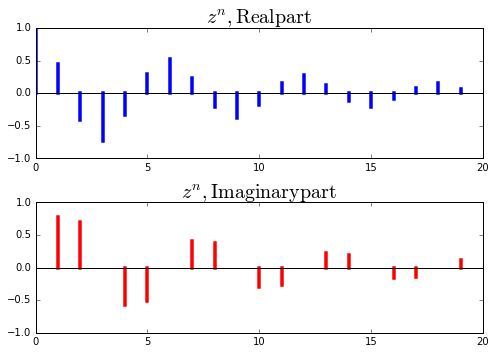

In [105]:
N = 20
n = np.array(range(N))

x = z**n

plt.figure(figsize=(7,5))
plt.subplot(2,1,1)
marker,stem,base = plt.stem(n, np.real(x),markerfmt=' ')
plt.setp(stem,'linewidth',3.5)
plt.axis([0,20,-1,1]), plt.axhline(0,c='k')
plt.title(r'$z^n, {\rm Real part}$', fontsize=20)
plt.subplot(2,1,2)
marker,stem,base = plt.stem(n, np.imag(x), markerfmt=' ',linefmt='r')
plt.axis([0,20,-1,1]), plt.axhline(0,c='k')
plt.setp(stem,'linewidth',3.5)
plt.title(r'$z^n, {\rm Imaginary part}$', fontsize=20)
plt.tight_layout()

plt.show()

___
# Key Signals
- Digital Signal Processing using MATLAB
- By Vinay K. Ingle, John G. Proakis
- from http://www.ece.iit.edu/~biitcomm/Yarmouk/Digital%20Signal%20Processing%20Using%20Matlab%20v4.0%20(John%20G%20Proakis).pdf

### Delta function: $\delta[n]$

$$x[n]=\delta[n-n_0]  \quad n_1 \leq n \leq n_2$$

```imp(n0,n1,n2)```: 

In [107]:
# it is same as impseq in matlab
def imp(t,a,b):
    n = np.array(range(a,b+1))
    zero = n*0
    
    for i in n:
        if n[i] == t:
            zero[i] = 1
            
    return zero

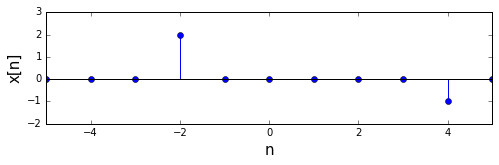

In [109]:
# delta function

n = np.array(range(-5,6))
x = 2*imp(-2,-5,5) -imp(4,-5,5)

plt.figure(figsize=(8,2))

plt.stem(n,x)
plt.xlabel('n',fontsize=15), plt.ylabel('x[n]',fontsize=15)
plt.axhline(0,c='k')
plt.axis([-5,5,-2,3])

plt.show()

### step function: $u[n]$

$$x[n]=u[n-n_0]  \quad n_1 \leq n \leq n_2$$

```step(n0,n1,n2)```: 

In [110]:
# it is same as stepseq in matlab
def step(t,a,b):
    n = np.array(range(a,b+1))
    zero = n*0
    
    for i in n:
        if n[i] == t:
            for k in range(i,b-a+1):
                zero[k] = 1
                
    return zero

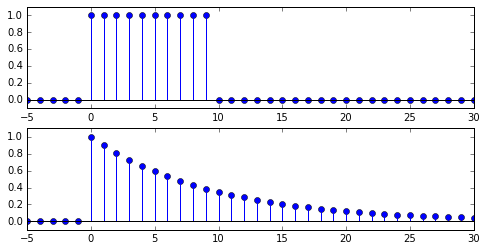

In [113]:
# step function

n = np.array(range(-5,31))
x = step(0,-5,30) - step(10,-5,30)

h = 0.9**n*step(0,-5,30)

plt.figure(figsize=(8,4))

plt.subplot(2,1,1), plt.stem(n,x), plt.axis('tight')
plt.ylim(-0.1, 1.1), plt.axhline(0,c='k')
plt.subplot(2,1,2), plt.stem(n,h), plt.axis('tight')
plt.ylim(-0.1, 1.1), plt.axhline(0,c='k')
plt.show()

## Signal Synthesis

\begin{align}
x[n]=\{1,2,&\;3,4,5,6,7,6,5,4,3,2,1\}\\
&\uparrow
\end{align}

$$x_1[n]=2x[n-5]-3x[n+4]$$

In [115]:
#Its are same as sigadd,sigshift,sigflod and sigmult function in matlab

# sigadd function
def sigadd(x1,n1,x2,n2):
    n = np.array(range(min(min(n1),min(n2)),max(max(n1),max(n2))+1))
    y1 = np.zeros(len(n))
    y2 = np.zeros(len(n))
    for i in range(len(n)):
        for k in range(len(n1)):
            if n[i] == n1[k]:
                y1[i] = x1[k]
            if n[i] == n2[k]:
                y2[i] = x2[k]
    y = y1 + y2
    return y,n

# sigshift function
def sigshift(x,m,n0):
    n= m + n0 
    return x,n

#sigfold function
def sigfold(x,n):
    y = x[::-1]
    n = -n[::-1]
    return y,n

#sigmult function
def sigmult(x1,n1,x2,n2):
    n = np.array(range(min(min(n1),min(n2)),max(max(n1),max(n2))+1))
    y1 = np.zeros(len(n))
    y2 = np.zeros(len(n))
    for i in range(len(n)):
        for k in range(len(n1)):
            if n[i] == n1[k]:
                y1[i] = x1[k]
            if n[i] == n2[k]:
                y2[i] = x2[k]
    y = y1 * y2
    return y,n

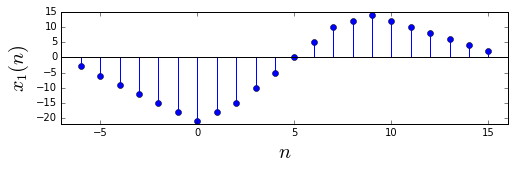

In [116]:
## example 1

n = np.array(range(-2,11))
x = np.array(list(range(1,8))+list(range(6,0,-1)))

x11,n11 = sigshift(x,n,5)
x12,n12 = sigshift(x,n,-4)
x1,n1 = sigadd(2*x11,n11,-3*x12,n12)

plt.figure(figsize=(8,2))
plt.stem(n1,x1)
plt.xlabel(r'$n$',fontsize=20), plt.ylabel(r'$x_1(n)$', fontsize=20)
plt.axis([min(n1)-1,max(n1)+1,min(x1)-1,max(x1)+1]), plt.axhline(0,c='k')
plt.show()

\begin{align}
x[n]=\{1,2,&\;3,4,5,6,7,6,5,4,3,2,1\}\\
&\uparrow
\end{align}

$$x_2[n]=x[3-n]+x[n]x[n-2]$$

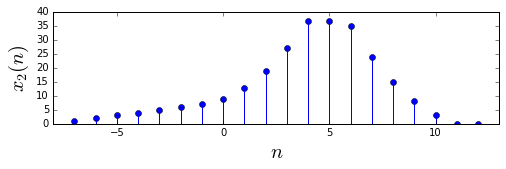

In [117]:
#example 2

x21,n21 = sigfold(x,n)
x21,n21 = sigshift(x21,n21,3)

x22,n22 = sigshift(x,n,2)
x22,n22 = sigmult(x,n,x22,n22)

x2,n2 = sigadd(x21,n21,x22,n22)

plt.figure(figsize=(8,2))
plt.stem(n2,x2), plt.xlabel(r'$n$',fontsize=20), plt.ylabel(r'$x_2(n)$', fontsize=20)
plt.axis([min(n2)-1,max(n2)+1,0,40])
plt.show()

$$x_3[n] = x[(n-6)_{15}]$$

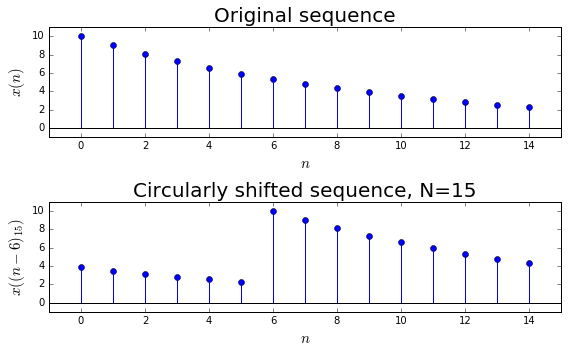

In [119]:
n = np.array(range(15))
x = 10*(0.9)**n

x3 = np.roll(x,6)

plt.figure(figsize=(8,5))

plt.subplot(2,1,1), plt.stem(n,x)
plt.title('Original sequence', fontsize=20)
plt.xlabel('$n$',fontsize=15), plt.ylabel(r'$x(n)$', fontsize=15)
plt.axis([-1,15,-1,11]), plt.axhline(0,c='k')

plt.subplot(2,1,2), plt.stem(n,x3)
plt.title('Circularly shifted sequence, N=15', fontsize=20)
plt.xlabel('$n$',fontsize=15), plt.ylabel(r'$x((n-6)_{15})$',fontsize=15)
plt.axis([-1,15,-1,11]), plt.axhline(0,c='k')
plt.tight_layout()
plt.show()

## Think of $x[k-n]$

Given 

\begin{align*}
x[n]=\{&\;0,1,2,3,0,0,0\}\\
&\uparrow
\end{align*}


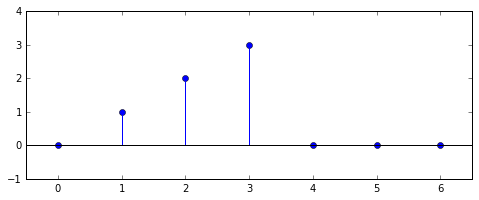

In [35]:
x = np.array([0,1,2,3,0,0,0])
N = len(x)
n = np.array(range(N))

plt.figure(figsize=(8,3))
plt.stem(n,x), plt.axis([-0.5,N-0.5,-1,4])
plt.axhline(0,c='k')
plt.show()

$$x_1[n] = x[-n]$$

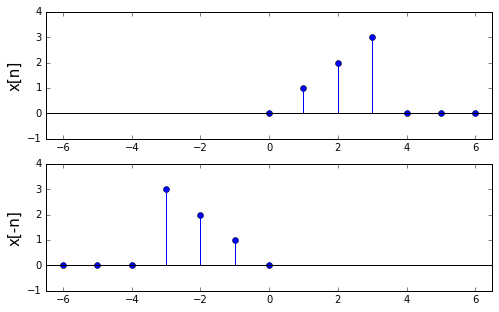

In [41]:
x1,n1 = sigfold(x,n)

plt.figure(figsize=(8,5))
plt.subplot(2,1,1), plt.stem(n,x)
plt.ylabel('x[n]',fontsize=15), plt.axis([-6.5, 6.5, -1, 4]), plt.axhline(0,c='k')
plt.subplot(2,1,2), plt.stem(n1,x1)
plt.ylabel('x[-n]',fontsize=15), plt.axis([-6.5, 6.5, -1 ,4]), plt.axhline(0,c='k')

plt.show()

$$x_2[n] = x[n-2]$$

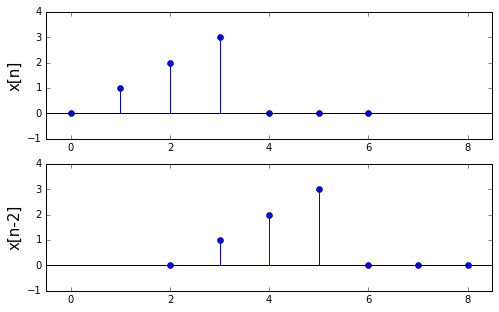

In [48]:
x2,n2 = sigshift(x,n,2)

plt.figure(figsize=(8,5))
plt.subplot(2,1,1), plt.stem(n,x)
plt.ylabel('x[n]', fontsize=15), plt.axis([-0.5, 8.5, -1, 4]), plt.axhline(0,c='k')
plt.subplot(2,1,2), plt.stem(n2,x2)
plt.ylabel('x[n-2]', fontsize=15), plt.axis([-0.5, 8.5, -1, 4]), plt.axhline(0,c='k')

plt.show()

$$x_3[n] = x[-n+2] ~?$$

$$x_4[n] = x[-n+2] ~?$$

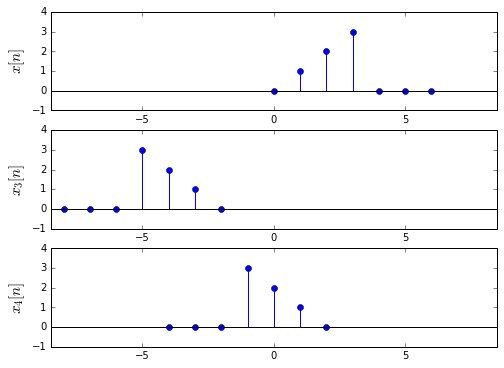

In [55]:
x2,n2 = sigshift(x,n,2)
x3,n3 = sigfold(x2,n2)
x1,n1 = sigfold(x,n)
x4,n4 = sigshift(x1,n1,2)

plt.figure(figsize=(8,6))
plt.subplot(3,1,1), plt.stem(n,x), plt.axhline(0,c='k')
plt.ylabel(r'$x[n]$', fontsize=15), plt.axis([-8.5, 8.5, -1, 4])
plt.subplot(3,1,2), plt.stem(n3,x3), plt.axhline(0,c='k')
plt.ylabel(r'$x_3[n]$', fontsize=15), plt.axis([-8.5, 8.5, -1, 4])
plt.subplot(3,1,3), plt.stem(n4,x4), plt.axhline(0,c='k')
plt.ylabel(r'$x_4[n]$', fontsize=15), plt.axis([-8.5, 8.5, -1, 4])
plt.show()


## Signals are vector

**Linear Combination in Sound** 
- at Rice University
- by Richard Baraniuk
- from https://www.youtube.com/watch?v=0TP97T2spDc&index=10&list=PLBD_gON7g_m2jozqQSteL73MTAhLIllQ6

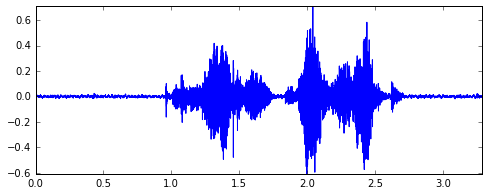

In [42]:
fs = 44100
N = 145000
M = 4

mat_contents = sio.loadmat('./image_files/hamlet.mat')
hamlet = 2*mat_contents['alas'][:N]

hamlet = hamlet.reshape(N)
t = np.array(range(N))/fs
#sound(hamlet,fs) 할필요?

plt.figure(figsize=(8,3))
plt.plot(t, hamlet)
plt.axis('tight')
plt.show()

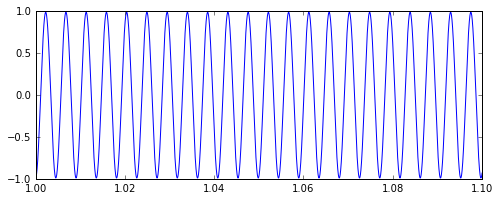

In [48]:
# sine wave

n = np.array(range(N))
sinewave = 0.99*np.cos(2*np.pi/200*n)
plt.figure(figsize=(8,3))
plt.plot(np.array(range(N))/fs,sinewave), plt.xlim([1,1.1])
#sound(sinewave,fs)
plt.show()

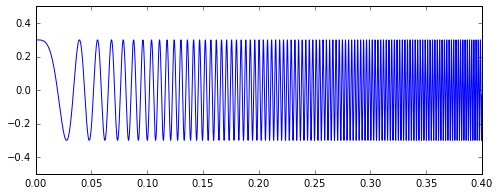

In [52]:
# chirp (https://en.wikipedia.org/wiki/Chirp)

chirp = 0.3*np.cos(2*np.pi/3000000*n**2)
plt.figure(figsize=(8,3))
plt.plot(np.array(range(N))/fs,chirp), plt.axis([0,0.4,-0.5,0.5])
#sound(chirp,fs)
plt.show()

In [ ]:
# white gaussian noise
#noise = 0.1*rand()

In [55]:
# white gaussian noise
noise = 0.1*np.random.randn(N);
#sound(noise,fs);

In [147]:
% build "X" matrix
X = [hamlet, sinewave, chirp, noise];

In [148]:
% specify an "a" vector, multiply by "X", and listen to the result "y"
a = [1 0 0 0]';

y = X*a;
sound(y,fs);

In [149]:
% specify an "a" vector, multiply by "X", and listen to the result "y"
a = [0 1 0 0]';
y = X*a;
sound(y,fs);

In [150]:
% specify an "a" vector, multiply by "X", and listen to the result "y"
a = [0 0 1 0]';
y = X*a;
sound(y,fs);

In [151]:
% specify an "a" vector, multiply by "X", and listen to the result "y"
a = [0 0 0 1]';
y = X*a;
sound(y,fs);

In [152]:
% specify an "a" vector, multiply by "X", and listen to the result "y"
a = [0.5 0.5 0.25 0.1]';
y = X*a;
sound(y,fs);

In [153]:
% specify an "a" vector, multiply by "X", and listen to the result "y"
a = [0.25 0.5 0.5 0.1]';
y = X*a;
sound(y,fs);

---
## Strength of a Vector

How to quantify the strength of a vector?

How to say that one signal is "stronger" than another?

__2-Norm__

The Euclidean length, or 2-norm, of a vector $x \in \mathbb{C}^N$ is given by

$$ \lVert x \rVert_2 = \sqrt{\sum_{n = 0}^{N} \lvert x[n] \rvert^2} $$

The energy of $x$ is given by $\lVert x \rVert_2^2$

__p-Norm__

The $p$-norm of a vector $x \in \mathbb{C}^N$ is given by

$$\lVert x \rVert_p = \left( \sum \limits_{n=0}^{N-1}{\lvert x[n] \rvert }\right)^{1/p}$$

__$\infty$-Norm__

The $\infty$-norm of a vector $x \in \mathbb{C} ^N$ is given by

$$\lVert x \rVert_\infty = \max \, \lvert \, x[n] \, \rvert$$

$\lVert x \rVert_\infty$ measures the __peak value__ (of the magnitude)



In [36]:
N = 8
n = np.array([range(N)])

k = 1
x = np.exp(1j*2*np.pi/N)**(n*k).T # d_k[n], k = 1 and N = 10

print(x)

[[ 1.00000000+0.j        ]
 [ 0.70710678+0.70710678j]
 [ 0.00000000+1.j        ]
 [-0.70710678+0.70710678j]
 [-1.00000000+0.j        ]
 [-0.70710678-0.70710678j]
 [-0.00000000-1.j        ]
 [ 0.70710678-0.70710678j]]


In [31]:
# multiple ways to compute norm of signal (vector)

print(sum(x*np.conj(x)))
print(sum(x*np.conj(x))/np.sqrt(N))

print(sum(abs(x)**2))
print(sum(abs(x)**2)/sqrt(N))

print(LA.norm(x,1))
print(LA.norm(x,2))
print(LA.norm(x,inf))


(8+0j)
(2.82842712475+0j)
8.0
2.82842712475
8.0
2.82842712475
1.0


---
**transpose**

In [120]:
x = np.array([[1 + 3j, 2 + 2j]])
print(x)

[[ 1.+3.j  2.+2.j]]


In [121]:
# Hermitian transpose (= complex conjugate transpose)
print(x.conj().T)

[[ 1.-3.j]
 [ 2.-2.j]]


In [122]:
# transpose
print(x.T)

[[ 1.+3.j]
 [ 2.+2.j]]


# Inner Product

$$
\langle x,y \rangle = y^H x = \sum \limits_{n=0}^{N-1} x[n]\, y[n]^*$$

<img src = "./image_files/Inner_Product.png" style="border:1px solid black" width = 750>

- Inner product of a signal with itself

$$\langle x,x \rangle = \sum \limits_{n=0}^{N-1} x[n]\, x[n]^* = \sum \limits_{n=0}^{N-1}{\lvert x[n] \rvert}^2 = \lVert x \rVert_2^2$$

- Two vectors $x,y \in \mathbb{C}^N$ are __orthogonal__ if 

$$\langle x,y \rangle = 0$$

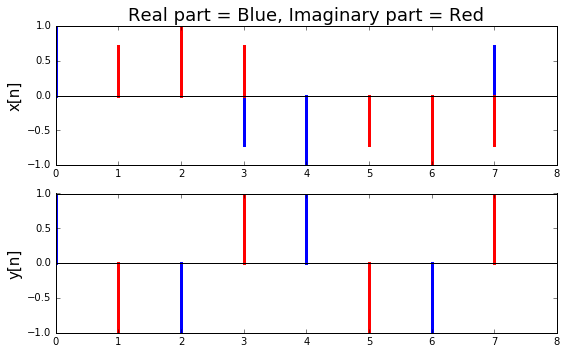

(-3.10862446895e-15-1.33226762955e-15j)


In [124]:
# INNER PRODUCT OF SINUSOIDS

N = 8
n = np.array(range(N))

k = 1
x = np.exp(1j*2*np.pi/N)**(n*k)

k = 6
y = np.exp(1j*2*np.pi/N)**(n*k)

plt.figure(figsize=(8,5))
plt.subplot(2,1,1)
marker,stem,base = plt.stem(n,x.real,markerfmt = ' ', linefmt = 'b')
plt.setp(stem,'linewidth', 3)
plt.ylabel('x[n]', fontsize=15)
marker,stem,base = plt.stem(n,x.imag,markerfmt = ' ', linefmt = 'r')
plt.setp(stem,'linewidth', 3)
plt.title('Real part = Blue, Imaginary part = Red',fontsize=18)
plt.axis([0,8,-1,1])
plt.axhline(0,c='k')

plt.subplot(2,1,2)
marker,stem,base = plt.stem(n,y.real,markerfmt = ' ', linefmt = 'b')
plt.setp(stem,'linewidth', 3)
plt.ylabel('y[n]', fontsize=15)
marker,stem,base = plt.stem(n,y.imag,markerfmt = ' ', linefmt = 'r')
plt.setp(stem,'linewidth', 3)
plt.axis([0,8,-1,1])
plt.axhline(0,c='k')
plt.tight_layout()

plt.show()

innerproduct = np.sum(y.conj()* x)
print(innerproduct)

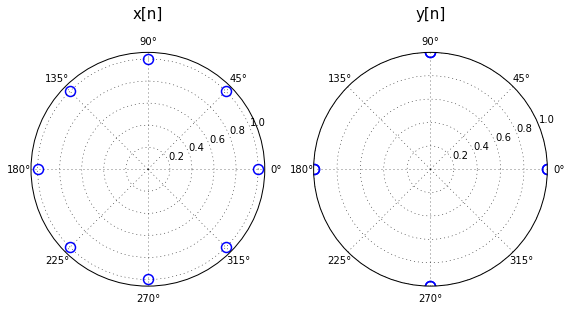

In [139]:
plt.figure(figsize=(8,8))
plt.subplot(121, projection='polar')
plt.plot(np.angle(x),abs(x),'o', mfc='none',mec='b',ms=10,mew=1.5)
plt.title('x[n]\n', fontsize=15)
plt.subplot(122, projection='polar')
plt.plot(np.angle(y),abs(y),'o', mfc='none',mec='b',ms=10,mew=1.5)
plt.title('y[n]\n', fontsize=15)
plt.tight_layout()
plt.show()

<img src = "./image_files/orthogonal.png" style="border:1px solid black" width = 750>

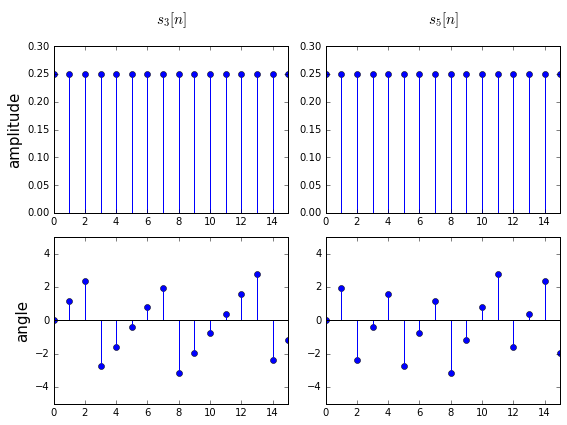

(1.21430643318e-16-6.24500451352e-17j)
(1+0j)
(1+0j)


In [143]:
# to check two complex signals are orthogonal

N = 16
n = np.array(range(N))

k = 3
s_3 = 1/np.sqrt(N)*np.exp(1j*2*np.pi/N)**(n*k)

k =5
s_5 = 1/np.sqrt(N)*np.exp(1j*2*np.pi/N)**(n*k)

# plot
plt.figure(figsize=(8,6))
plt.subplot(221), plt.stem(n,abs(s_3)), plt.axis([0,15,0,0.3]), plt.title('$s_3[n]$\n',fontsize=15)
plt.ylabel('amplitude',fontsize=15)
plt.subplot(222), plt.stem(n,abs(s_5)), plt.axis([0,15,0,0.3]), plt.title('$s_5[n]$\n',fontsize=15)
plt.subplot(223), plt.stem(n,np.angle(s_3)), plt.axis([0,15,-5,5]), plt.ylabel('angle',fontsize=15)
plt.axhline(0,c='k')
plt.subplot(224), plt.stem(n,np.angle(s_5)), plt.axis([0,15,-5,5])
plt.axhline(0,c='k')
plt.tight_layout()
plt.show()

# complex conjugate transpose
print(np.sum(s_3.conj()*s_5)) # to see they are orthogonal
print(np.sum(s_3.conj()*s_3)) # to see it is normalized
print(np.sum(s_5.conj()*s_5)) # to see it is normalized

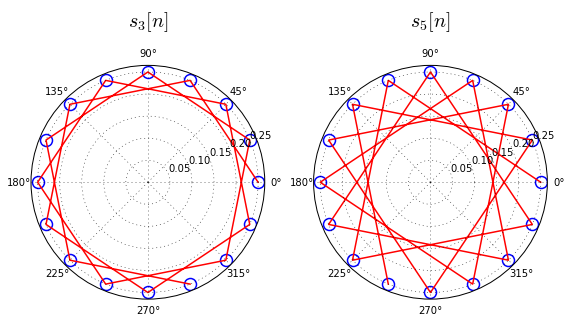

In [151]:
## polar
# angle(H) returns the phase angles, in radians

plt.figure(figsize=(8,8))
plt.subplot(121, projection='polar')
plt.plot(np.angle(s_3),abs(s_3),'o', mfc='none',mec='b',ms=12,mew=1.5)
plt.plot(np.angle(s_3),abs(s_3),'r',lw=1.5), plt.title('$s_3[n]$\n', fontsize=20)
plt.subplot(122, projection='polar')
plt.plot(np.angle(s_5),abs(s_5),'o', mfc='none',mec='b',ms=12,mew=1.5)
plt.plot(np.angle(s_5),abs(s_5),'r', lw=1.5), plt.title('$s_5[n]$\n', fontsize=20)
plt.tight_layout()

plt.show()

---
# Exersise
**Digital Communication**

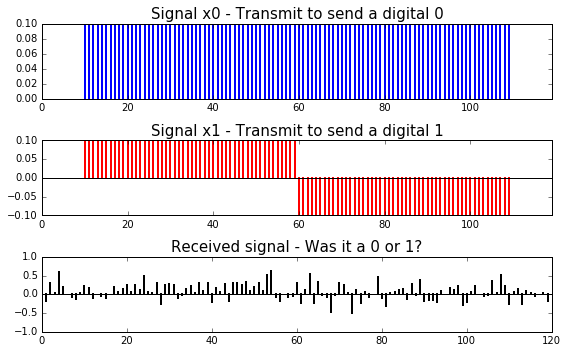

In [157]:
N = 120
n = np.array(range(N))
x0 = np.hstack([np.zeros(10), np.ones(100), np.zeros(10)])
x0 = x0/LA.norm(x0)
x1 = np.hstack([np.zeros(10), np.ones(50),-1*np.ones(50), np.zeros(10)])
x1 = x1/LA.norm(x1)
signals = np.vstack([x0,x1])

plt.figure(figsize=(8,5))
plt.subplot(311)
marker,stem,base = plt.stem(n,x0, markerfmt=' ',linefmt='b')
plt.setp(stem,'linewidth',2)
plt.axis('tight'), plt.title('Signal x0 - Transmit to send a digital 0', fontsize=15)
plt.subplot(312)
marker,stem,base = plt.stem(n,x1, markerfmt=' ',linefmt='r')
plt.setp(stem,'linewidth',2)
plt.axhline(0,c='k'), plt.axis('tight')
plt.title('Signal x1 - Transmit to send a digital 1', fontsize=15)
# received signal is either x0 or x1 with additive noise

y = np.array(range(len(x0))) *0.1

for i in range(len(x0)):
    r = np.random.rand()
    r = round(r)
    y[i] = signals[r,i]

y = y + 0.2*np.random.randn(len(x1))

plt.subplot(313) 
marker,stem,base = plt.stem(n,y, markerfmt=' ',linefmt='k')
plt.setp(stem,'linewidth',2)
plt.axhline(0,c='k'), plt.axis([0,120,-1,1])
plt.title('Received signal - Was it a 0 or 1?',fontsize=15)
plt.tight_layout()
plt.show()

In [158]:
# computes the inner products between y and both x0 and x1:

innerproduct0 = abs(np.sum(y.conj()*x0))
print('innerproduct0 = '+ str(innerproduct0))
innerproduct1 = abs(np.sum(y.conj()*x1))
print('innerproduct1 = ' + str(innerproduct1))

RECEIVEDBIT = int(innerproduct1>innerproduct0)
print('RECEIVEDBIT = ' + str(RECEIVEDBIT))

innerproduct0 = 0.808036317593
innerproduct1 = 0.441984697761
RECEIVEDBIT = 0


# Aliasing
- Media Signal Processing MAT 201A
- at Media Arts and Technology, University of California, Santa Barbara
- by Andres Cabrera
- from http://nbviewer.ipython.org/github/mantaraya36/201A-ipython/blob/master/Sampling%20and%20Quantization.ipynb?create=1

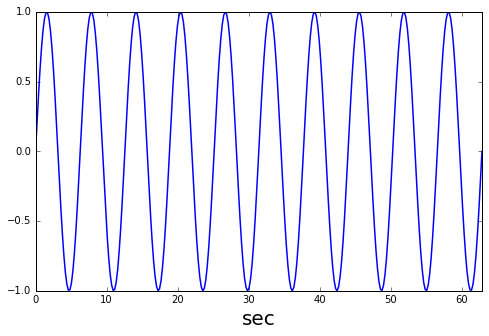

In [38]:
t = np.linspace(0,10*2*np.pi,300)
x = np.sin(t)
plt.figure(figsize=(8,5))
plt.plot(t,x,lw=1.5), plt.axis('tight'), plt.xlabel('sec',fontsize=20)
plt.show()

Anything less than 20 points will cause problems:

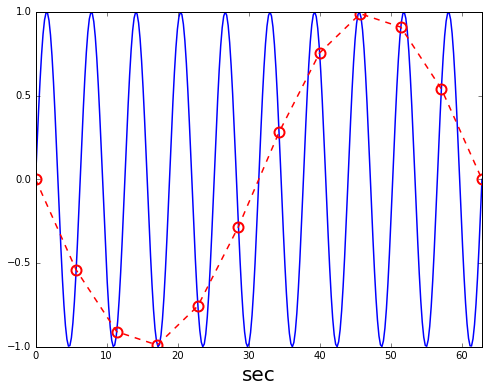

In [35]:
t = np.linspace(0,10*2*np.pi,300)
x = np.sin(t)
ts = np.linspace(0,10*2*np.pi,12)
xs = np.sin(ts)

plt.figure(figsize=(8,6))
plt.plot(t,x,ts,xs,'ro--',ms=10,mfc='none',mec='r',mew=2,lw=1.5)
plt.axis('tight'), plt.xlabel('sec',fontsize=20)
plt.show()

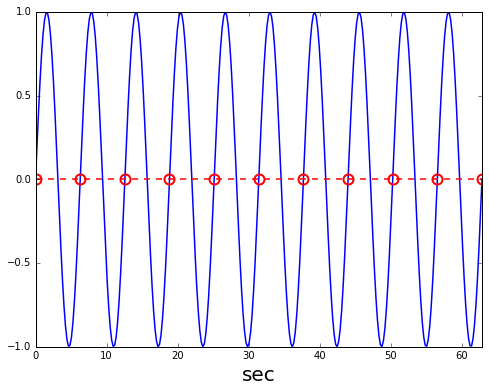

In [36]:
t = np.linspace(0,10*2*np.pi,300)
x = np.sin(t)
ts = np.linspace(0,10*2*np.pi,11)
xs = np.sin(ts)

plt.figure(figsize=(8,6))
plt.plot(t,x,ts,xs,'ro--',ms=10,mfc='none',mec='r',mew=2,lw=1.5)
plt.axis('tight'), plt.xlabel('sec',fontsize=20)
plt.show()

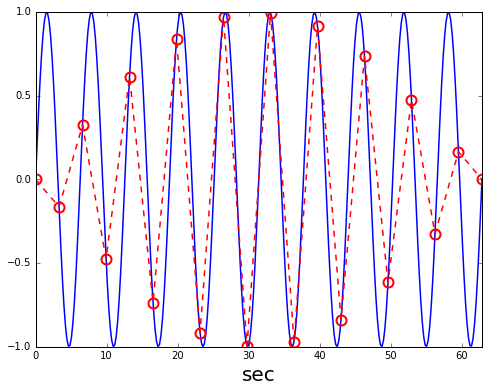

In [37]:
t = np.linspace(0,10*2*np.pi,300)
x = np.sin(t)
ts = np.linspace(0,10*2*np.pi,20)
xs = np.sin(ts)

plt.figure(figsize=(8,6))
plt.plot(t,x,ts,xs,'ro--',ms=10,mfc='none',mec='r',mew=2,lw=1.5)
plt.axis('tight'), plt.xlabel('sec',fontsize=20)
plt.show()

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>